In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8, 8]

### Misure di temperatura

Supponiamo di avere un termometro che segni la temperatura in unità ignote $t_u$. Al fine di capire che relazione c'è con una scala di temperatura conosciuta, prendiamo delle misure su un arco, diciamo, di una settimana, usando un termometro in gradi centigradi $t_c$. Alla fine del nostro esperimento avremo due set di dati, con un valore di $t_c$ per ogni valore di $t_u$

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = np.array(t_c)
t_u = np.array(t_u)

Possiamo riportare questi dati su un grafico per cominciare ad avere un'idea di una possibile relazione fra i due set.

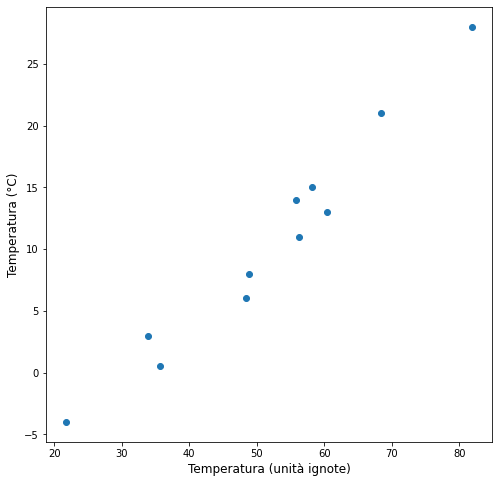

In [3]:
plt.scatter(t_u, t_c)
plt.xlabel('Temperatura (unità ignote)', fontsize='large')
plt.ylabel('Temperatura (°C)', fontsize='large')
plt.show()

Il grafico mostra che la dipendenza potrebbe essere approssimativamente lineare, anche se i punti deviano leggermente da una retta. In pratica, assumendo un relazione lineare, ci aspettiamo sempre che ci siano delle deviazioni dovute all'errore sperimentale (errore umano, precisione del termometro). Assumiamo dunque una dipendenza lineare per il momento.

In [4]:
def retta(x: float) -> float:
    y = w * x + b
    return y

Questa funzione rappresenta una semplice retta, ma le incognite sono i parametri $w$ e $b$. Sono questi i parametri che dovremo raffinare allo scopo di ottenere un relazione tra $t_u$ e $t_c$. Notiamo a questo punto che la nostre variabili $x$, $y$ ci sono note e sono rappresentate appunto dai due set di temperatura $t_c$, $t_u$, rispettivamente. Vorremo dunque che, usando la retta di cui sopra, applicata alla temperatura $t_c$, il valore risulti uguale a $t_u$.

`t_u[i] == retta(t_c[i])` per ogni `i` in `range(len(t_c))`

Ovviamente questa relazione, considerata la presenza dell'errore sperimentale, non sarà mai esattamente soddisfatta, ma ci accontenteremo dell'approssimazione migliore. Cercheremo dunque di minimizzare la differenza tra il valore *desiderato* e il valore *predetto*, ovvero $t_u - retta(t_c)$.  
Attenzione però: se il valore di $t_u$ è maggiore del valore predetto $retta(t_c)$ la differenza sarà minima quando di due valori sono il più vicino possibile (la differenza è positiva), ma se $t_u$ è minore di $retta(t_c)$ allora la differenza sarà minore se la distanza è maggiore (più negativa). Dobbiamo dunque minimizzare la differenza *senza* segno. Abbiamo due scelte per ciò: $|t_u-retta(t_c)|$ e $(t_u-retta(t_c))^2$.

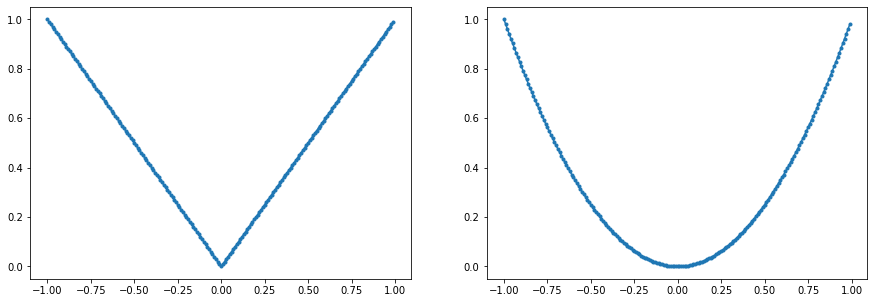

In [5]:
x = np.arange(-1, 1, 0.01)
y = np.abs(x)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x, y, marker='.')
y = x**2
ax[1].plot(x, y, marker='.')

Entrambe le funzioni hanno un minimo in 0 e sono positive altrimenti. La parabola, però, è meno "ripida" nell'intorno dello zero, una caratteristica importante per fare *convergere* il nostro *modello*.

Ricapitolando: vogliamo trovare una funzione lineare del tipo $y = w\cdot t_c + b$ tale per cui il valore $L=(t_u-y)^2$ è minimo, al variare dei parametri $w$, $b$. Il minimo di una funzione si calcola con le derivate parziali rispetto alle variabili in gioco:  
  
$\frac{\partial L}{\partial w} = \frac{\partial}{\partial w} (t_u-w\cdot t_c-b)^2 = -2(t_u-w\cdot t_c-b)t_c$  
  
$\frac{\partial L}{\partial b} = \frac{\partial}{\partial b} (t_u-w\cdot t_c-b)^2 = -2(t_u-w\cdot t_c-b)$  

**Nomenclatura** La funzione $L$ è detta *loss function* perché misura la "perdita" nella precisione. Più è piccola, meno approssimiamo. 

Il vettore $\nabla L = \left(\frac{\partial L}{\partial w}, \frac{\partial L}{\partial b}\right)$ è detto il *gradiente* della funzione $L$ e rappresenta la direzione nel piano in cui la funzione **cresce**. Se usiamo la direzione opposta, possiamo sfruttare il gradiente per muovere i parametri $w$, $b$ verso il minimo di $L$.

$w'=w - \eta\frac{\partial L}{\partial w}=w+\eta\cdot2(t_u-w\cdot t_c-b)t_c$ 
  
$b'=b - \eta\frac{\partial L}{\partial b}=b+\eta\cdot2(t_u-w\cdot t_c-b)$

Abbiamo introdotto un altro parametro, il **learning rate** $\eta$ (tasso di apprendimento), che determina quanto veloce ci muoviamo verso il minimo. Senza potremmo fare passi troppo grandi e finire allontanarci, nonostante la direzione sia giusta.

Ora cerchiamo di raggruppare tutto in una classe:

In [6]:
class LinearModel:
    def __init__(self, learning_rate: float = 0.001):
        # Inizializziamo i parametri a caso, tanto vanno trovati.
        self.w = np.random.random()
        self.b = np.random.random()
        self.learning_rate = learning_rate
        
    def predict(self, x: float) -> float:
        return x*self.w + self.b
    
    def loss(self, x: float, target: float) -> float:
        return (target-self.predict(x))**2
    
    def __gradient(self, x: float, target: float) -> np.array:
        dw = -2*(target-self.w*x-self.b)*x
        db = -2*(target-self.w*x-self.b)
        return np.array([dw, db])
    
    def optimise(self, x: float, target: float):
        dw, db = self.__gradient(x, target)
        self.w -= self.learning_rate*dw
        self.b -= self.learning_rate*db

In [7]:
modello = LinearModel()
modello.w, modello.b

(0.29500962479730364, 0.773167535051093)

Facciamo una prima predizione senza allenare il modello (i parametri sono a caso)

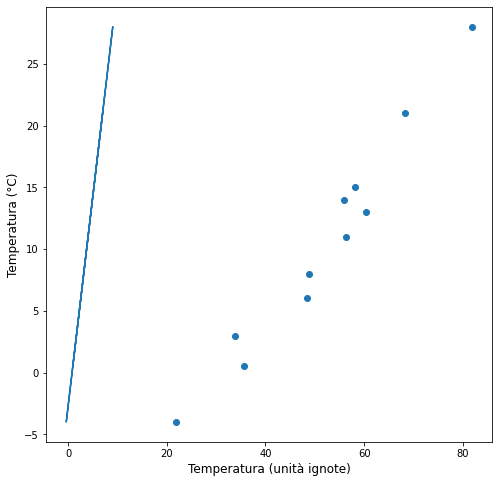

In [8]:
# Facciamo una predizione senza allenare
y = np.array([modello.predict(t) for t in t_c])
plt.scatter(t_u, t_c)
plt.plot(y, t_c, '-')
plt.xlabel('Temperatura (unità ignote)', fontsize='large')
plt.ylabel('Temperatura (°C)', fontsize='large')
plt.show()

La retta non c'entra molto con i dati, come c'era da aspettarsi. Calcoliamo anche la perdita per ogni dato e la perdita media sul dataset.

In [9]:
L = np.array([modello.loss(c, u) for c, u in zip(t_c, t_u)])
mean_L = np.mean(L)
history = [mean_L] # Salviamo tutta la storia di perdita
print(L)
print(mean_L)

[1209.60163196 2600.66317812 2809.17894071 5309.53599915 2733.37893546
 2094.59590594 1039.53389877  493.14511802 2102.84378737 3112.7146082
 3773.84520675]
2479.9124736767394


Considerando che il valore dovrebbe essere il più vicino allo zero possibile, siamo lontani. Proviamo ad ottimizzare.

In [10]:
for c, u in zip(t_c, t_u):
    modello.optimise(c, u)

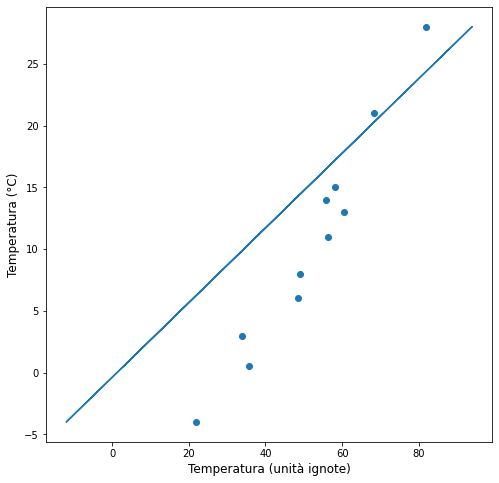

In [11]:
y = np.array([modello.predict(t) for t in t_c])
plt.scatter(t_u, t_c)
plt.plot(y, t_c, '-')
plt.xlabel('Temperatura (unità ignote)', fontsize='large')
plt.ylabel('Temperatura (°C)', fontsize='large')
plt.show()

In [12]:
L = np.array([modello.loss(c, u) for c, u in zip(t_c, t_u)])
mean_L = np.mean(L)
history.append(mean_L)
print(L)
print(mean_L)

[1075.99074856   69.33404073   53.5443926   144.08488851  347.99468633
  448.69936086  516.60927031 1142.045367    745.35175566  260.37080404
    5.46818477]
437.2266817601428


Uhm... non molto meglio. Proviamo più volte.

In [13]:
for epoch in range(100):
    L = []
    for c, u in zip(t_c, t_u):
        modello.optimise(c, u)
        L.append(modello.loss(c, u))
    history.append(np.mean(L))

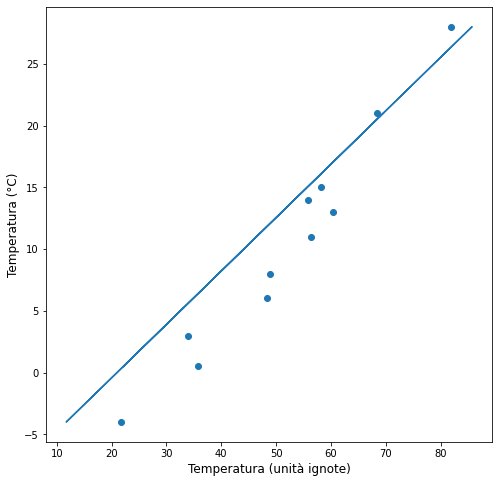

In [14]:
y = np.array([modello.predict(t) for t in t_c])
plt.scatter(t_u, t_c)
plt.plot(y, t_c, '-')
plt.xlabel('Temperatura (unità ignote)', fontsize='large')
plt.ylabel('Temperatura (°C)', fontsize='large')
plt.show()

In [15]:
L = np.array([modello.loss(c, u) for c, u in zip(t_c, t_u)])
mean_L = np.mean(L)
print(L)
print(mean_L)

[183.89707915   6.4648695    6.40164604  14.68327261  97.61441491
  88.68724846  35.75690055 101.34349657 183.39436073  87.51741131
   1.31018367]
73.37008031743648


Ok, ci stiamo avvicinando

In [16]:
for epoch in range(100):
    L = []
    for c, u in zip(t_c, t_u):
        modello.optimise(c, u)
        L.append(modello.loss(c, u))
    history.append(np.mean(L))

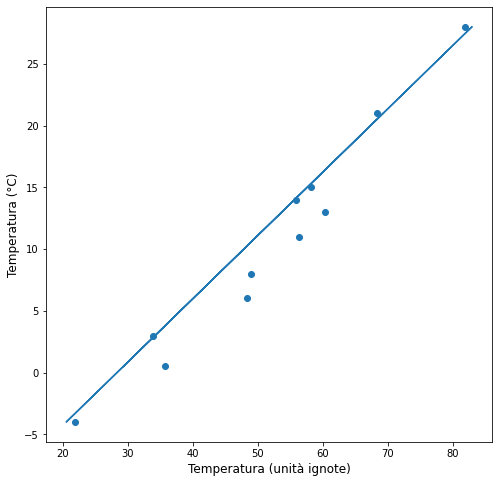

In [17]:
y = np.array([modello.predict(t) for t in t_c])
plt.scatter(t_u, t_c)
plt.plot(y, t_c, '-')
plt.xlabel('Temperatura (unità ignote)', fontsize='large')
plt.ylabel('Temperatura (°C)', fontsize='large')
plt.show()

In [18]:
L = np.array([modello.loss(c, u) for c, u in zip(t_c, t_u)])
mean_L = np.mean(L)
print(L)
print(mean_L)

[4.09695044e+01 6.74164790e-02 3.70216957e-01 1.11734404e+00
 4.24220823e+01 2.46691068e+01 7.68610123e-02 1.64123696e+00
 7.00432576e+01 4.50353615e+01 8.07660000e-01]
20.65636800314718


Ancora un po'

In [19]:
for epoch in range(100):
    L = []
    for c, u in zip(t_c, t_u):
        modello.optimise(c, u)
        L.append(modello.loss(c, u))
    history.append(np.mean(L))

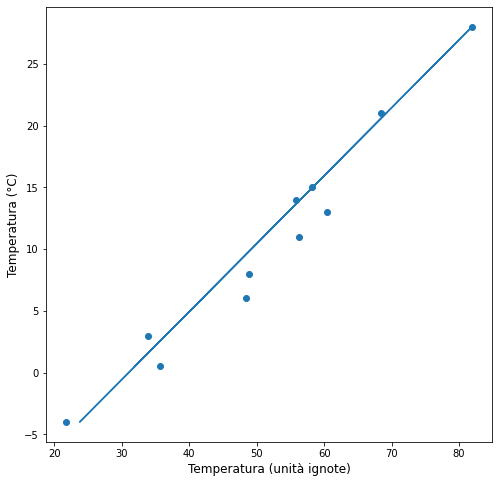

In [20]:
y = np.array([modello.predict(t) for t in t_c])
plt.scatter(t_u, t_c)
plt.plot(y, t_c, '-')
plt.xlabel('Temperatura (unità ignote)', fontsize='large')
plt.ylabel('Temperatura (°C)', fontsize='large')
plt.show()

In [21]:
L = np.array([modello.loss(c, u) for c, u in zip(t_c, t_u)])
mean_L = np.mean(L)
print(L)
print(mean_L)

[1.39745015e+01 3.47243853e-01 1.12630507e-02 6.36211236e-04
 2.76811361e+01 1.09683312e+01 6.78021881e+00 3.94384138e+00
 4.15451679e+01 3.28051671e+01 6.51650329e-01]
12.609923401794


Vediamo cosa succede alla nostra funzione di perdita

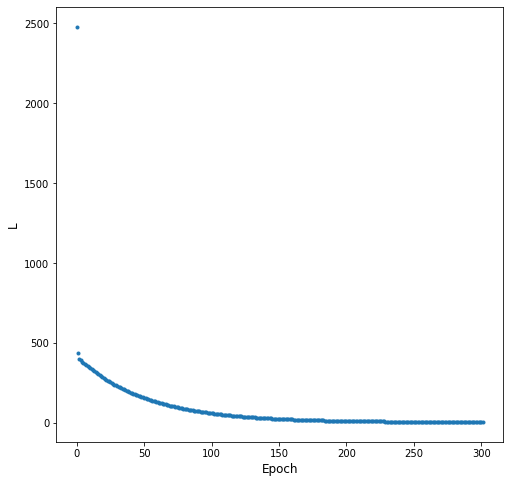

In [23]:
epochs = np.array([epoch for epoch in range(len(history))])
history = np.array(history)
plt.plot(epochs, history,'.')
plt.xlabel('Epoch', fontsize='large')
plt.ylabel('L', fontsize='large')
plt.show()